In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from pathlib import Path
from collections import Counter

Exploring raw data


In [2]:
images_dir = Path("../data/raw/images").resolve()
exts = {".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tif", ".tiff", ".webp"}

if not images_dir.exists():
    print(f"Not found: {images_dir}")
else:
    results = []
    for d in sorted(p for p in images_dir.iterdir() if p.is_dir()):
        ext_counts = Counter()
        total = 0
        for f in d.iterdir():
            if f.is_file():
                ext = f.suffix.lower()
                if ext in exts:
                    ext_counts[ext.lstrip('.')] += 1
                    total += 1
        results.append((d, total, ext_counts))

    # sort by total images descending
    results.sort(key=lambda x: x[1], reverse=True)

    overall = Counter()
    for d, total, ext_counts in results:
        formats = ", ".join(f"{k}: {v}" for k, v in sorted(ext_counts.items(), key=lambda x: -x[1]))
        print(f"{d.name}: {total} images" + (f" ({formats})" if formats else ""))
        overall.update(ext_counts)

    if overall:
        total_images = sum(overall.values())
        overall_fmt = ", ".join(f"{k}: {v}" for k, v in sorted(overall.items(), key=lambda x: -x[1]))
        print(f"\nTotal images: {total_images} ({overall_fmt})")

Vincent_van_Gogh: 877 images (jpg: 877)
Edgar_Degas: 702 images (jpg: 702)
Pablo_Picasso: 439 images (jpg: 439)
Pierre-Auguste_Renoir: 336 images (jpg: 336)
Albrecht_Dürer: 328 images (jpg: 328)
Paul_Gauguin: 311 images (jpg: 311)
Francisco_Goya: 291 images (jpg: 291)
Rembrandt: 262 images (jpg: 262)
Alfred_Sisley: 259 images (jpg: 259)
Titian: 255 images (jpg: 255)
Marc_Chagall: 239 images (jpg: 239)
Rene_Magritte: 194 images (jpg: 194)
Amedeo_Modigliani: 193 images (jpg: 193)
Paul_Klee: 188 images (jpg: 188)
Henri_Matisse: 186 images (jpg: 186)
Andy_Warhol: 181 images (jpg: 181)
Mikhail_Vrubel: 171 images (jpg: 171)
Sandro_Botticelli: 164 images (jpg: 164)
Leonardo_da_Vinci: 143 images (jpg: 143)
Peter_Paul_Rubens: 141 images (jpg: 141)
Salvador_Dali: 139 images (jpg: 139)
Hieronymus_Bosch: 137 images (jpg: 137)
Pieter_Bruegel: 134 images (jpg: 134)
Diego_Velazquez: 128 images (jpg: 128)
Kazimir_Malevich: 126 images (jpg: 126)
Frida_Kahlo: 120 images (jpg: 120)
Giotto_di_Bondone: 119

In [3]:
artists_file = Path("../data/artists.csv").resolve()
artists = pd.read_csv(artists_file)
artists = artists.sort_values(by=['paintings'], ascending=False)

# Create a dataframe with artists having more than 99 paintings
artists_top = artists[artists['paintings'] >= 99].reset_index()
artists_top = artists_top[['name', 'paintings']]
artists_top['class_weight'] = artists_top.paintings.sum() / (artists_top.shape[0] * artists_top.paintings)
artists_top

,name,paintings,class_weight
0,Vincent van Gogh,877,0.264465
1,Edgar Degas,702,0.330392
2,Pablo Picasso,439,0.528327
3,Pierre-Auguste Renoir,336,0.690284
4,Albrecht Dürer,328,0.707120
5,Paul Gauguin,311,0.745773
6,Francisco Goya,291,0.797029
7,Rembrandt,262,0.885250
8,Alfred Sisley,259,0.895504
9,Titian,255,0.909551


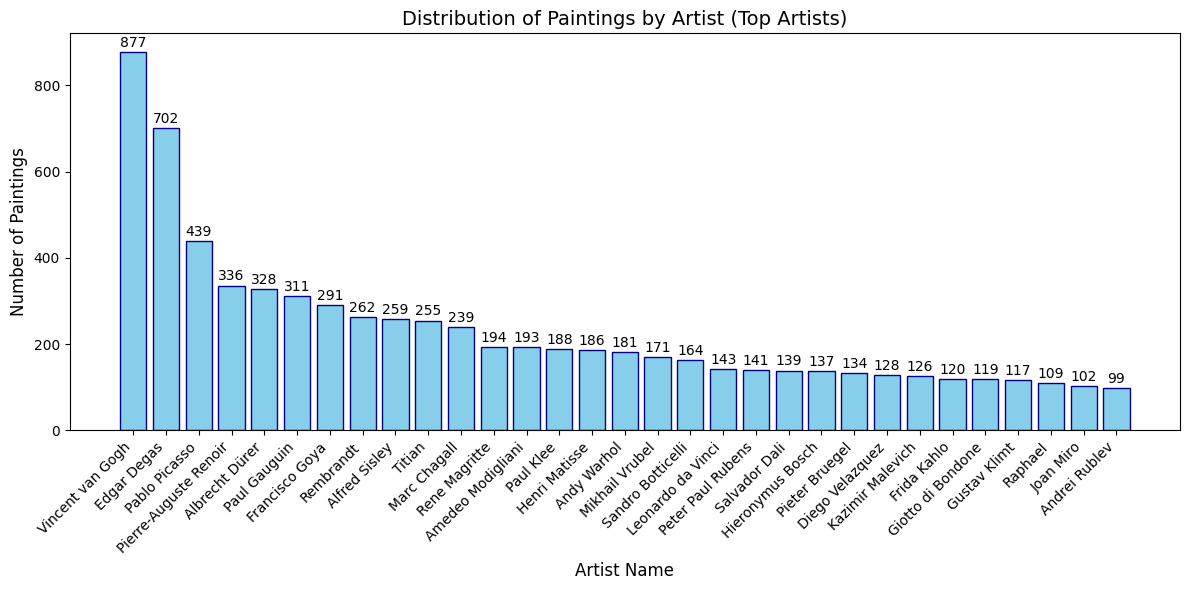

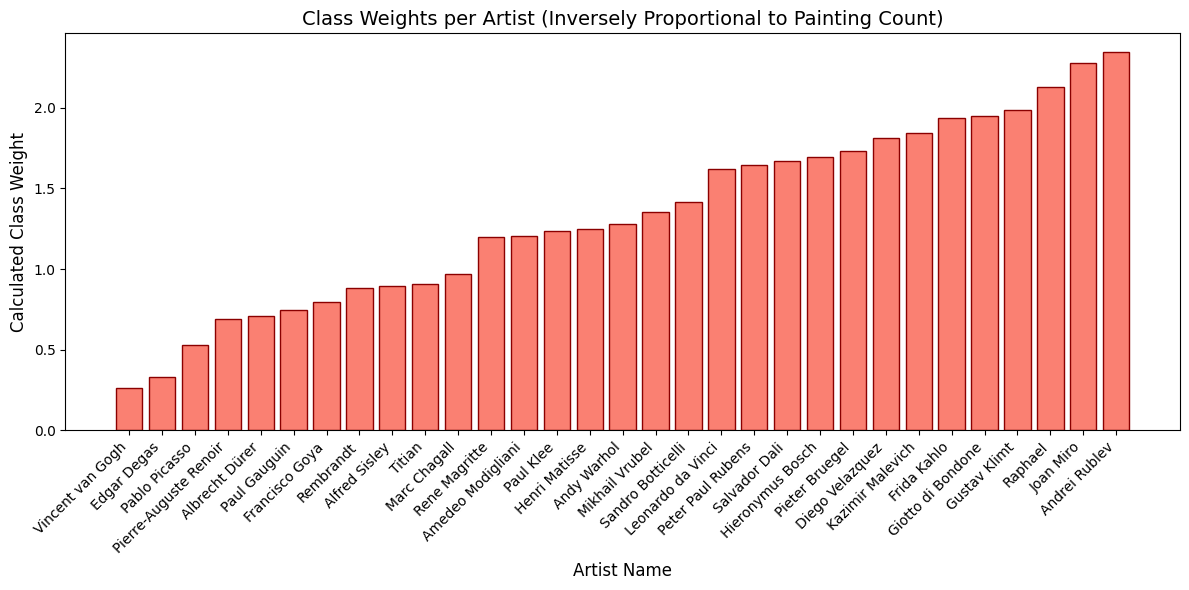

In [ ]:
# 1. Visualize the Number of Paintings per Artist
plt.figure(figsize=(12, 6))
bars = plt.bar(artists_top['name'], artists_top['paintings'], color='skyblue', edgecolor='navy')

plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Number of Paintings', fontsize=12)
plt.title('Distribution of Paintings by Artist (Top Artists)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Adding labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Visualize Class Weights
# These show how the model compensates for dataset imbalance
plt.figure(figsize=(12, 6))
plt.bar(artists_top['name'], artists_top['class_weight'], color='salmon', edgecolor='darkred')

plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Calculated Class Weight', fontsize=12)
plt.title('Class Weights per Artist (Inversely Proportional to Painting Count)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Exploring distributions.

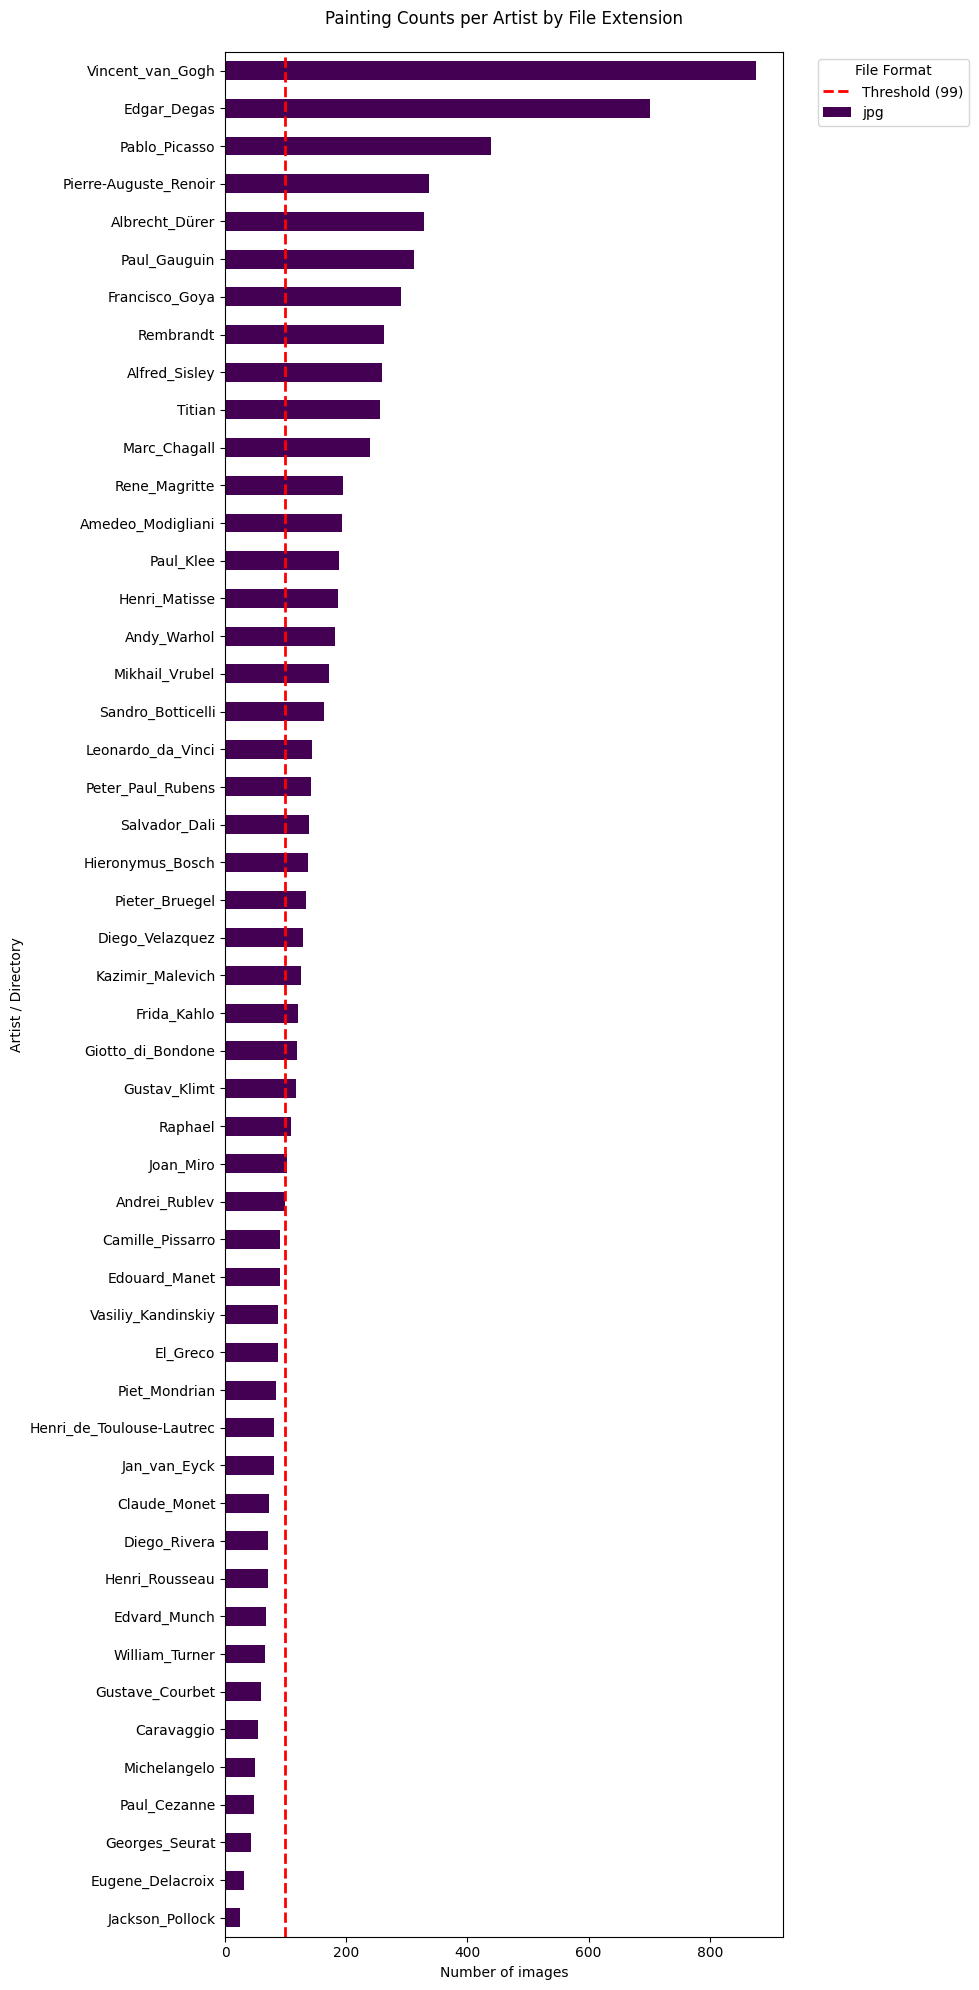

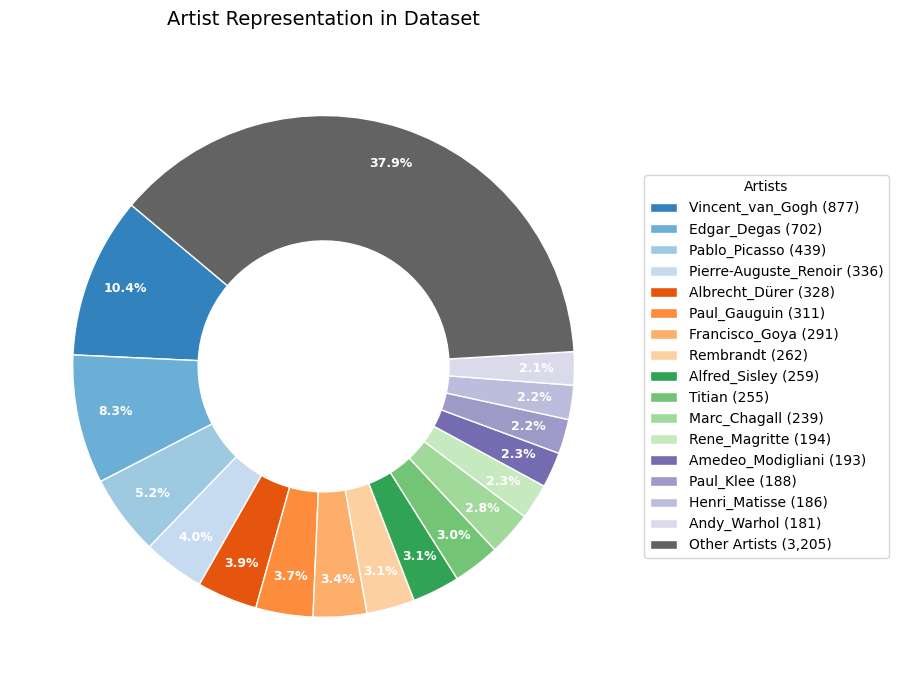

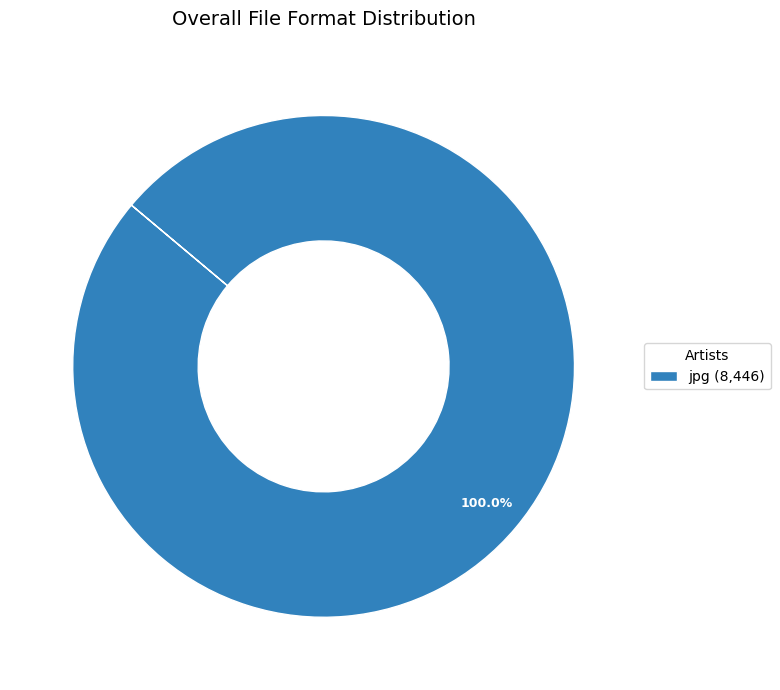

In [ ]:
if not results:
    print("No results to plot")
else:
    # 1. Data Preparation
    rows = []
    for d, total, ext_counts in results:
        row = {"dir": d.name, "total": total}
        row.update(ext_counts)
        rows.append(row)

    df = pd.DataFrame(rows).fillna(0).set_index("dir")
    
    # Sort columns by frequency and rows by total paintings
    format_cols = [c for c in df.columns if c != "total"]
    format_cols = df[format_cols].sum().sort_values(ascending=False).index.tolist()
    df = df.sort_values("total", ascending=False)

    # --- VISUALIZATION 1: STACKED BAR CHART ---

    ax = df[format_cols].plot.barh(
        stacked=True, 
        figsize=(10, max(5, len(df) * 0.4)),
        colormap="viridis"
    )
    ax.invert_yaxis()
    ax.set_xlabel("Number of images")
    ax.set_ylabel("Artist / Directory")
    ax.axvline(99, color="red", linestyle="--", linewidth=2, label="Threshold (99)")
    ax.legend(title="File Format", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.title("Painting Counts per Artist by File Extension", pad=20)
    plt.tight_layout()
    plt.show()

    # --- VISUALIZATION 2: REFINED PIE CHART (DONUT STYLE) ---
    def plot_clean_pie(sizes, labels, title):
        fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
        
        # Use a qualitative color palette for distinction
        colors = plt.get_cmap("tab20c").colors
        
        # Create donut chart (wedgeprop creates the center hole)
        wedges, texts, autotexts = ax.pie(
            sizes, 
            labels=None, # Labels moved to legend for cleanliness
            autopct=lambda p: f'{p:.1f}%' if p > 2 else '', # Only show % if > 2%
            startangle=140,
            colors=colors,
            pctdistance=0.85,
            wedgeprops=dict(width=0.5, edgecolor='w') 
        )

        # Style the percentage text
        plt.setp(autotexts, size=9, weight="bold", color="white")
        
        # Add a clean legend with counts + labels
        legend_labels = [f'{l} ({s:,})' for l, s in zip(labels, sizes)]
        ax.legend(
            wedges, legend_labels,
            title="Artists",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1)
        )
        
        ax.set_title(title, fontsize=14, pad=20)
        plt.tight_layout()
        plt.show()

    # Prep data for Artist Distribution Pie
    n_top = 16 
    counts = df["total"].copy()
    
    if len(counts) > n_top:
        top = counts.nlargest(n_top)
        others_val = counts.drop(top.index).sum()
        final_labels = top.index.tolist() + ["Other Artists"]
        final_sizes = top.tolist() + [others_val]
    else:
        final_labels = counts.index.tolist()
        final_sizes = counts.tolist()

    plot_clean_pie(final_sizes, final_labels, "Artist Representation in Dataset")

    # --- VISUALIZATION 3: FORMAT DISTRIBUTION ---
    overall_formats = df[format_cols].sum()
    plot_clean_pie(overall_formats.values, overall_formats.index, "Overall File Format Distribution")

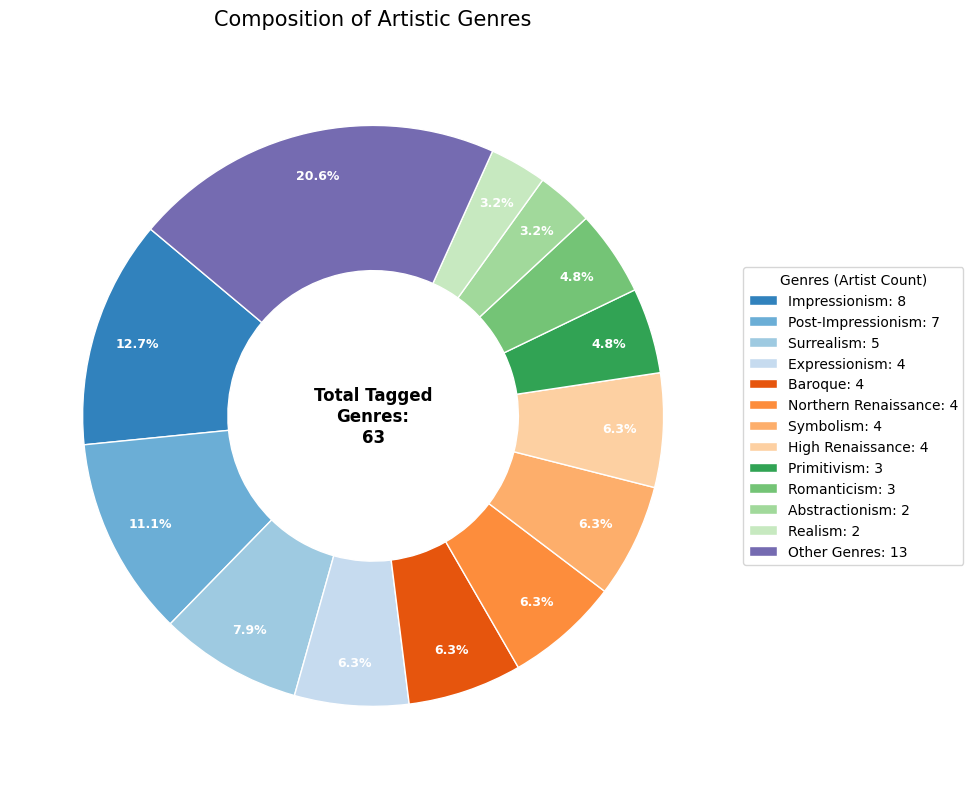

In [ ]:
artists_file = Path("../data/artists.csv").resolve()

if not artists_file.exists():
    print(f"Not found: {artists_file}")
else:
    df_artists = pd.read_csv(artists_file)
    if "genre" not in df_artists.columns:
        print("No 'genre' column in artists.csv")
    else:
        # 1. Handle multi-valued genre fields
        genres = (
            df_artists["genre"]
            .fillna("Unknown")
            .astype(str)
            .str.split(r"[|,;/]+", regex=True)
            .explode()
            .str.strip()
            .replace("", "Unknown")
        )
        counts = genres.value_counts()

n_top = 12  
if len(counts) > n_top:
    top = counts.nlargest(n_top)
    others = counts.drop(top.index).sum()
    labels = top.index.tolist() + ["Other Genres"]
    sizes = top.tolist() + [others]
else:
    labels = counts.index.tolist()
    sizes = counts.tolist()

# 2. Plotting
fig, ax = plt.subplots(figsize=(10, 8))

colors = plt.get_cmap("tab20c").colors
        
# Create donut chart (wedgeprop creates the center hole)
wedges, texts, autotexts = ax.pie(
            sizes, 
            labels=None, # Labels moved to legend for cleanliness
            autopct=lambda p: f'{p:.1f}%' if p > 2 else '', # Only show % if > 2%
            startangle=140,
            colors=colors,
            pctdistance=0.85,
            wedgeprops=dict(width=0.5, edgecolor='w') 
        )

        # Style the percentage text
plt.setp(autotexts, size=9, weight="bold", color="white")

# 3. Enhanced Legend
# We combine the label and the raw count for the legend
legend_labels = [f'{l}: {s}' for l, s in zip(labels, sizes)]
ax.legend(
    wedges, 
    legend_labels,
    title="Genres (Artist Count)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)


ax.text(0, 0, f'Total Tagged\nGenres:\n{sum(sizes)}', 
        ha='center', va='center', fontsize=12, fontweight='bold')

ax.set_title("Composition of Artistic Genres", fontsize=15, pad=20)
plt.tight_layout()
plt.show()

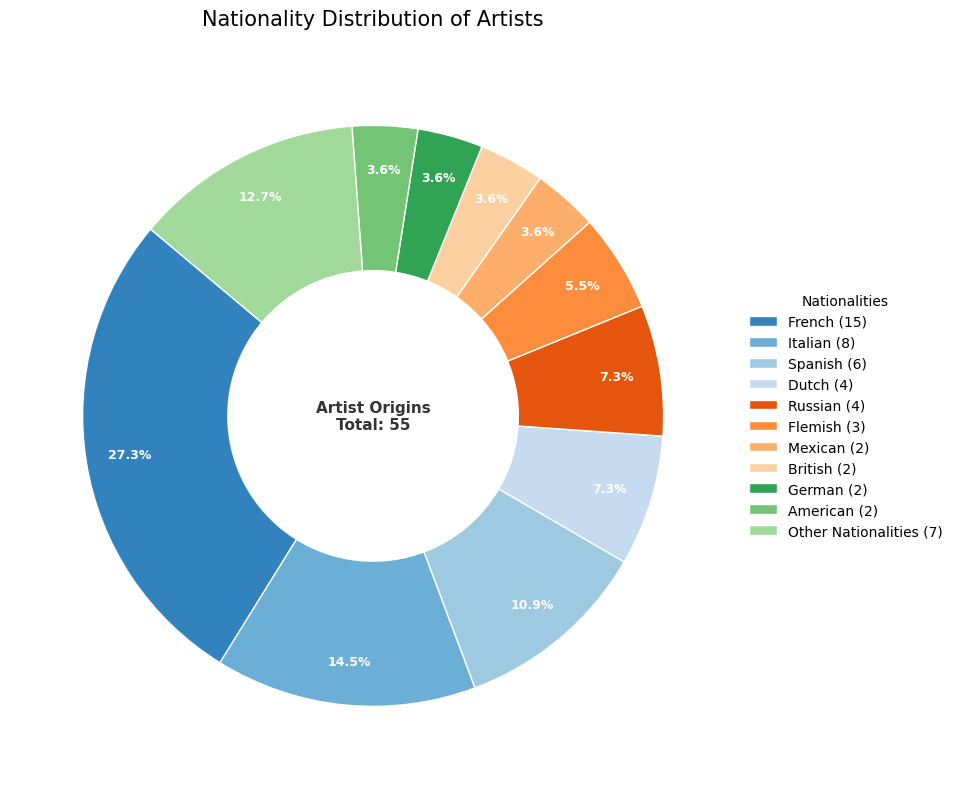

In [ ]:
artists_file = Path("../data/artists.csv").resolve()
if not artists_file.exists():
    print(f"Not found: {artists_file}")
else:
    df_artists = pd.read_csv(artists_file)
    if "nationality" not in df_artists.columns:
        print("No 'nationality' column in artists.csv")
    else:
        # handle multi-valued nationality fields and clean
        nats = (
            df_artists["nationality"]
            .fillna("Unknown")
            .astype(str)
            .str.split(r"[|,;/]+", regex=True)
            .explode()
            .str.strip()
            .replace("", "Unknown")
            .fillna("Unknown")
        )
        counts = nats.value_counts()

# 1. Prepare and Sort Data
n_top = 10  
counts = nats.value_counts()

if len(counts) > n_top:
    top = counts.nlargest(n_top)
    others_sum = counts.drop(top.index).sum()
    labels = top.index.tolist() + ["Other Nationalities"]
    sizes = top.tolist() + [others_sum]
else:
    labels = counts.index.tolist()
    sizes = counts.tolist()

# 2. Plotting (Donut Style)
fig, ax = plt.subplots(figsize=(10, 8))

colors = plt.get_cmap("tab20c").colors
        
# Create donut chart (wedgeprop creates the center hole)
wedges, texts, autotexts = ax.pie(
            sizes, 
            labels=None, # Labels moved to legend for cleanliness
            autopct=lambda p: f'{p:.1f}%' if p > 2 else '', # Only show % if > 2%
            startangle=140,
            colors=colors,
            pctdistance=0.85,
            wedgeprops=dict(width=0.5, edgecolor='w') 
        )

        # Style the percentage text
plt.setp(autotexts, size=9, weight="bold", color="white")

# 3. Professional Legend
# Combine nationality name with the artist count for the legend
legend_labels = [f'{l} ({s})' for l, s in zip(labels, sizes)]
ax.legend(
    wedges, 
    legend_labels,
    title="Nationalities",
    loc="center left",
    bbox_to_anchor=(1.0, 0, 0.5, 1),
    fontsize=10,
    frameon=False
)

# 4. Central Annotation
ax.text(0, 0, f'Artist Origins\nTotal: {sum(sizes)}', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='#333333')

ax.set_title(f"Nationality Distribution of Artists", fontsize=15, pad=20)
plt.tight_layout()
plt.show()

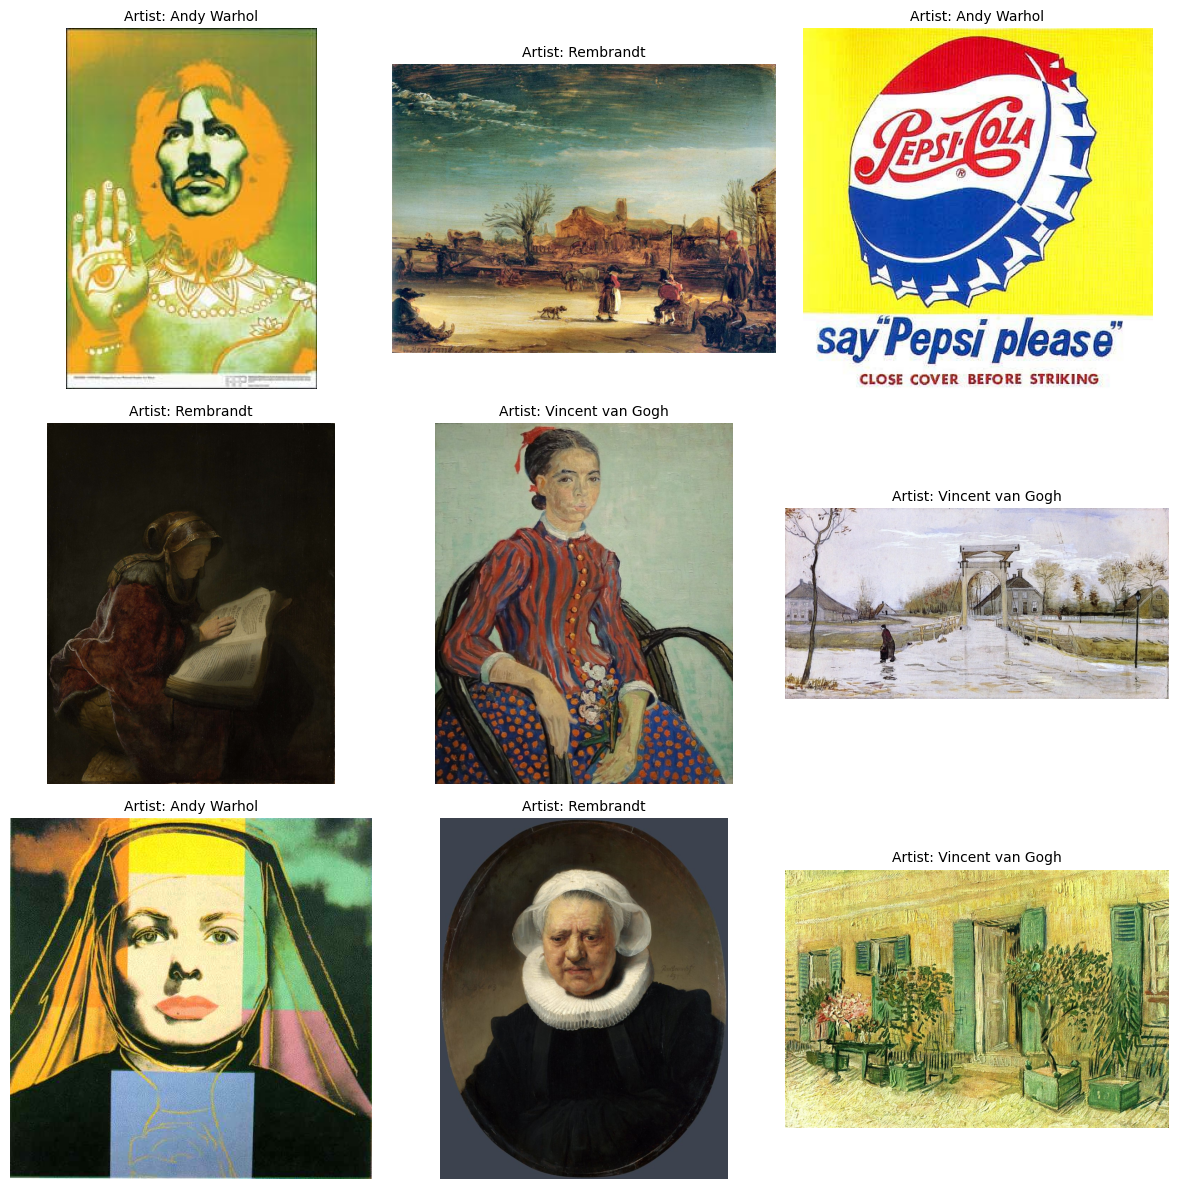

In [7]:
random.seed(66)
# Define the paths
artist_folders = [
    '../data/raw/images/Vincent_van_Gogh',
    '../data/raw/images/Andy_Warhol',
    '../data/raw/images/Rembrandt'
]

selected_images = []

# 1. Sample exactly 3 images from each artist
for path in artist_folders:
    if os.path.exists(Path(path).resolve()):
        # Get all jpg files in this specific artist's folder
        files = [os.path.join(path, f) for f in os.listdir(path) if f.lower().endswith('.jpg')]
        selected_images.extend(random.sample(files, 3))


# 2. Shuffle the selection so they aren't grouped by artist in the grid
random.shuffle(selected_images)

# 3. Plot the 3x3 grid
plt.figure(figsize=(12, 12))

for i, img_path in enumerate(selected_images):
    if i >= 9: break  # Safety check for 3x3 grid
    
    plt.subplot(3, 3, i + 1)
    img = Image.open(img_path)
    plt.imshow(img)
    
    # Extract artist name from the folder name for the title
    folder_name = os.path.basename(os.path.dirname(img_path)).replace('_', ' ')
    plt.title(f"Artist: {folder_name}", fontsize=10)
    
    plt.axis('off')

plt.tight_layout()
plt.show()